**Descriptive Diagrams**

import packages

In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from ipywidgets import interact  # widget manipulation
from download import download

Import Data

In [15]:
url1 ='https://www.data.gouv.fr/fr/datasets/r/0b66ca39-1623-4d9c-83ad-5434b7f9e2a4'
path_target = "./covid.csv"
download(url1, path_target, replace=True)
df_covid = pd.read_csv("covid.csv",converters={'Date': str})



file_sizes: 100%|██████████████████████████| 6.54M/6.54M [00:05<00:00, 1.16MB/s]
Successfully downloaded file to ./covid.csv


C:\Users\Jihene Belgaied\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3146: DtypeWarning: Columns (17,18) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


In [16]:
#exctraction de colonnes du dataframe df_covid
df_departement = df_covid.loc[:,['date', 'granularite','maille_code','maille_nom','cas_confirmes','hospitalises','deces','gueris']]
#filtrage des données selon le departement
df_departement = df_departement.loc[df_departement['granularite']=="departement",:]


In [18]:
df_departement['date'] = pd.to_datetime(df_departement['date'])
#df2_covid = df2_covid.set_index(['date'])

In [30]:
#df_departement.maille_nom.unique()

array(['Charente', 'Charente-Maritime', 'Corrèze', 'Creuse', 'Dordogne',
       'Gironde', 'Landes', 'Lot-et-Garonne', 'Pyrénées-Atlantiques',
       'Deux-Sèvres', 'Vienne', 'Haute-Vienne', 'Hérault', 'Haute-Savoie',
       'Aisne', 'Doubs', 'Nord', 'Oise', 'Pas-de-Calais', 'Somme',
       'Territoire de Belfort', "Côte-d'Or", 'Finistère',
       'Loire-Atlantique', 'Bas-Rhin', 'Alpes-Maritimes',
       'Maine-et-Loire', 'Mayenne', 'Seine-Maritime', 'Ille-et-Vilaine',
       'Morbihan', 'Sarthe', 'Ain', 'Ardennes', 'Aube', 'Eure', 'Marne',
       'Haute-Marne', 'Meurthe-et-Moselle', 'Meuse', 'Moselle',
       'Haut-Rhin', 'Rhône', 'Vosges', 'Allier', 'Ardèche', 'Cantal',
       'Drôme', 'Gard', 'Isère', 'Loire', 'Haute-Loire', 'Puy-de-Dôme',
       'Saône-et-Loire', 'Savoie', 'Aveyron', 'Bouches-du-Rhône',
       "Côtes-d'Armor", 'Eure-et-Loir', 'Indre-et-Loire', 'Haute-Saône',
       'Vaucluse', 'Guyane', 'Hautes-Alpes', 'Calvados', 'Cher',
       'Corse-du-Sud', 'Haute-Corse', 'Haut

In [ ]:
#update
#df_covid[(df_covid['granularite'] == 'departement') & (df_covid['date'] == '2021-04-06')]

Set the current date for the chart : 

In [20]:
current_date = df_departement['date'].max().strftime('%d/%m/%Y')
current_date

'06/04/2021'

Create different datasets useful for the charts : 

In [26]:
gb_departement= df_departement[df_departement['date'] == df_departement['date'].max()].reset_index()
current_date = gb_departement['date'].max().strftime('%d/%m/%Y')
#hospitalisees total = hospitalises + gueris
data_ratio_hospitalises = (gb_departement['deces'] / (gb_departement['hospitalises'] + gb_departement['gueris'])) * 100
data_hospitalises = gb_departement['hospitalises'] + gb_departement['gueris']
data_deces = gb_departement['deces']
data_depcode = gb_departement['maille_nom']


**Ratio des descès par rapport au nombre d'hospitalisations à la date updated :** 

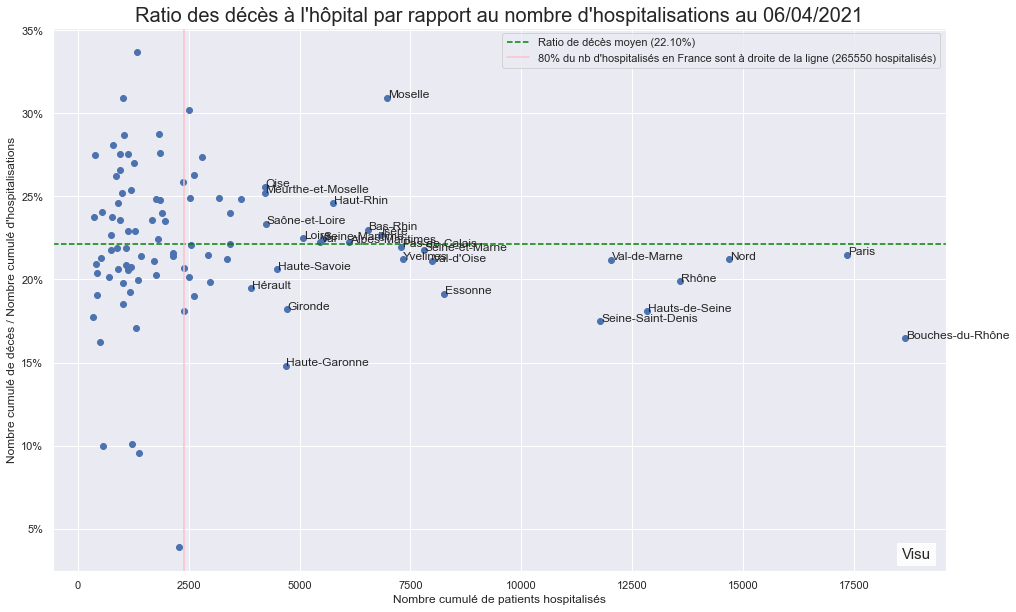

In [35]:
import matplotlib.ticker as mtick

fig, ax = plt.subplots(figsize=(16, 10))

plt.title(f"Ratio des décès à l'hôpital par rapport au nombre d'hospitalisations au {current_date}", fontsize=20)
plt.ylabel("Nombre cumulé de décès / Nombre cumulé d'hospitalisations")
plt.xlabel("Nombre cumulé de patients hospitalisés")

nbhospitalises_80p = data_hospitalises.sum() * 0.80
min_value_80p = data_hospitalises.loc[data_hospitalises[data_hospitalises.sort_values(ascending=False).cumsum() <= nbhospitalises_80p].index].min()

for i, txt in enumerate(data_depcode):
    if (data_hospitalises[i] > data_hospitalises.max() * 0.20):
    #if (data_hospitalises[i] > min_value_80p):
        ax.annotate(txt, (data_hospitalises[i], data_ratio_hospitalises[i]), xytext=(data_hospitalises[i] + 20, data_ratio_hospitalises[i]))        

plt.axhline(data_ratio_hospitalises.mean(), color='green', linestyle='--', label=f'Ratio de décès moyen ({data_ratio_hospitalises.mean():.2f}%)')

plt.axvline(min_value_80p, color='pink', linestyle='-', label=f"80% du nb d'hospitalisés en France sont à droite de la ligne ({nbhospitalises_80p:.0f} hospitalisés)")

ax.scatter(data_hospitalises, data_ratio_hospitalises)

ax.annotate('Visu',xy=(1, 0), xytext=(-15, 10), fontsize=15,
    xycoords='axes fraction', textcoords='offset points',
    bbox=dict(facecolor='white', alpha=0.9),
    horizontalalignment='right', verticalalignment='bottom')

ax.yaxis.set_major_formatter(mtick.FormatStrFormatter('%.0f%%'))
plt.legend()

current_date_file = gb_departement['date'].max().strftime('%Y%m%d')
plt.savefig('covid19-comparatif-departements-'+str(current_date_file)+'.png')

**Nombre de décès à l'hôpital par rapport au nombre d'hospitalisations à la date updated**

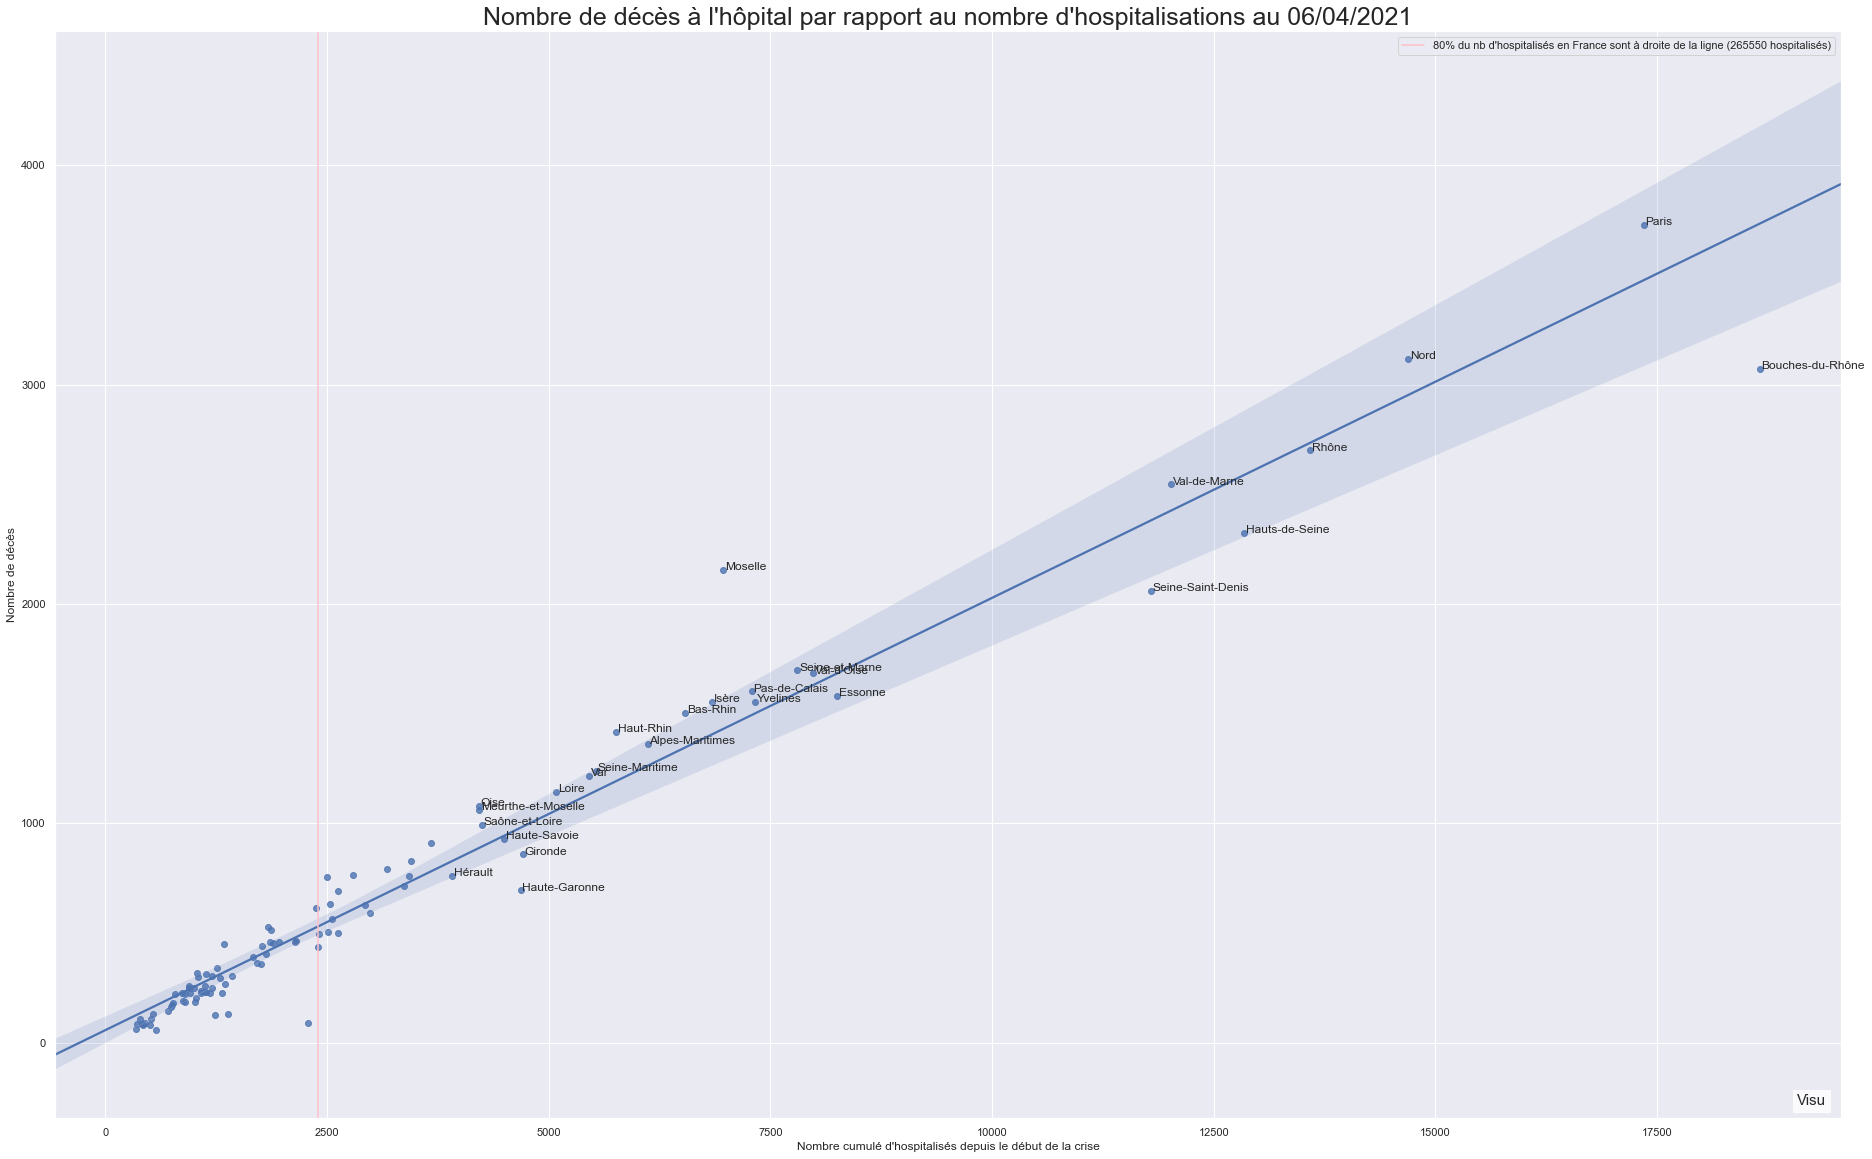

In [36]:
import seaborn as sns; sns.set(color_codes=True)

plt.figure(figsize=(32, 20))

plt.title(f"Nombre de décès à l'hôpital par rapport au nombre d'hospitalisations au {current_date}", fontsize=25)
# Set x-axis label

ax = sns.regplot(x=data_hospitalises, y=data_deces, ci=99.9, truncate=False)

ax.set(xlabel="Nombre cumulé d'hospitalisés depuis le début de la crise", ylabel='Nombre de décès')
plt.axvline(min_value_80p, color='pink', linestyle='-', label=f"80% du nb d'hospitalisés en France sont à droite de la ligne ({nbhospitalises_80p:.0f} hospitalisés)")
plt.legend()

for i, txt in enumerate(data_depcode):
    if (data_hospitalises[i] > data_hospitalises.max() * 0.20):
        ax.annotate(txt, (data_hospitalises[i], data_deces[i]), xytext=(data_hospitalises[i] + 20, data_deces[i]))      
        #ax.annotate(txt, (data_hospitalises[i], data_hospitalises[i]))      
        
ax.annotate('Visu', xy=(1, 0), xytext=(-15, 10), fontsize=15,
    xycoords='axes fraction', textcoords='offset points',
    bbox=dict(facecolor='white', alpha=0.8),
    horizontalalignment='right', verticalalignment='bottom')
        
plt.savefig('covid19-comparatif-departements-regplot-'+str(current_date_file)+'.png')